# RBM Algorithm Example

Bu örnekte, RBM (Bernoulli Restricted Boltzmann Machine) algoritmasını kullanarak bir sınıflandırma işlemi gerçekleştiriyoruz. İşlemler adım adım şu şekildedir:

Veri Setinin Yüklenmesi ve Normalizasyonu:

digits veri seti kullanılıyor. Bu veri seti, el yazısı rakamların görüntülerinden oluşuyor.
Görüntü verileri normalleştiriliyor, yani her bir pikselin değeri 0 ile 1 arasında olacak şekilde ölçeklendiriliyor.
RBM ve Lojistik Regresyon Modelinin Tanımlanması:

RBM modeli 64 bileşenle (n_components=64) tanımlanıyor.
RBM modelinin çıktıları, bir lojistik regresyon modeli ile sınıflandırılıyor.
Bu iki model Pipeline kullanılarak birleştiriliyor.
Veri Setinin Eğitim ve Test Olarak Ayrılması:

Veri seti, eğitim ve test setleri olarak ikiye ayrılıyor (train_test_split).
RBM Modelinin Eğitimi:

Eğitim verileri kullanılarak RBM modeli eğitiliyor (rbm.fit).
Lojistik Regresyon Modelinin Eğitimi:

Eğitim verileri kullanılarak lojistik regresyon modeli eğitiliyor (classifier.fit).
Modelin Tahminlerde Bulunması ve Doğruluğunun Hesaplanması:

Test verileri üzerinde modelin tahminleri alınıyor (classifier.predict).
Modelin doğruluğu hesaplanıyor (accuracy_score).
RBM Modelinin Bileşenlerinin Görselleştirilmesi:

RBM modelinin öğrendiği 64 bileşen, 8x8 piksellik görüntüler olarak görselleştiriliyor ve grafik olarak gösteriliyor.

Bu adımlar sonucunda, RBM modelinin nasıl çalıştığını ve lojistik regresyon ile nasıl sınıflandırma yaptığını öğrenmiş oluyoruz. Ayrıca, modelin öğrendiği bileşenleri görselleştirerek RBM'nin veri üzerinde nasıl özellikler öğrendiğini görebiliyoruz.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn import linear_model
from sklearn import datasets

# Generate a dataset
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)


In [2]:

# Initialize the RBM
rbm = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=20, random_state=0)
logistic = linear_model.LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='multinomial')
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, digits.target, test_size=0.2, random_state=0)

# Training RBM
rbm.fit(X_train)

# Training logistic regression
classifier.fit(X_train, Y_train)

# Predictions
Y_pred = classifier.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7388888888888889


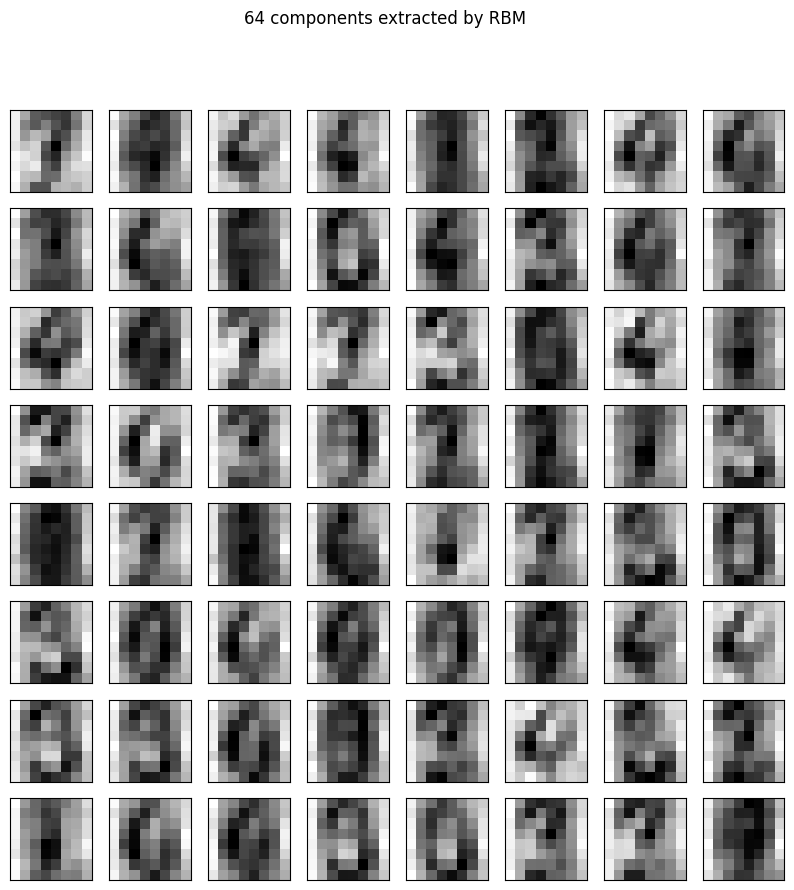

In [3]:

# Plotting RBM components
components = rbm.components_

plt.figure(figsize=(10, 10))
for i, comp in enumerate(components[:64]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('64 components extracted by RBM')
plt.show()
